In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import skimage.io

In [184]:
A = ski.io.imread('data/test/lena.png')
B = ski.io.imread('data/test/barbara.png')

In [239]:
def imfix(X, **kwargs):
    assert 'overflow' in kwargs
    overflow = kwargs['overflow']
    
    # Assume gray scale...
    typed = np.uint8
    if 'dtype' in kwargs:
        typed = kwargs['dtype']
        
    if overflow == 'cap':
        assert 'cap_max' in kwargs
        return np.minimum(X, kwargs['cap_max']).astype(typed)
    elif overflow == 'mod':
        assert 'mod_max' in kwargs
        return np.mod(X, kwargs['mod_max']).astype(typed)
    
# Ejercicio 1a, suma de imágenes
def imsum(A, B, **kwargs):
    assert A.shape == B.shape
    return imfix(np.sum([A, B], axis=0, dtype=np.uint64), **kwargs)

# Ejercicio 1b, producto de una imágen por un escalar o una matriz punto a punto
def improd(alpha, A, **kwargs):
    return imfix(np.multiply(alpha, A, dtype=np.double), **kwargs)

# Ejercicio 1c
def dynrange(A, target, **kwargs):
    # Utilizamos 1 + R porque R puede ser 0, y el logarítmo no está definido en 0
    c = float(target) / np.log(1 + np.max(A))
    return (c * np.log(1 + A)).astype(np.uint8)

# Ejercicio 2
def imneg(A, max_value=255):
    return max_value - A

# Ejercicio 3
def imbinarize(A, threshold=128, max_value=255, min_value=0):
    X = np.copy(A)
    indexes = X > threshold
    X[indexes] = max_value
    X[np.invert(indexes)] = min_value
    return X

# Ejercicio 4:
def imbits(A):
    # Los elementos de este arreglo son 0 o 1
    X = np.unpackbits(A.reshape((A.shape[0], A.shape[1], 1)), axis=2)
    # Ampliamos el rango a 255 para poder ver la diferencia en las imágenes
    X = dynrange(X, 256)
    ims = []
    for i in range(8):
        ims.append(X[:,:,i])
    return np.array(ims)

# Ejercicio 5
def imcountarr(A):
    # Usamos uint64, porque es un conteo de número de píxeles
    counts = np.zeros(shape=(256,), dtype=np.uint64)
    for row in A:
        for element in row:
            counts[element] += 1
    return counts

def imrelfreq(A):
    return imcountarr(A).astype(np.double) / float(A.shape[0] * A.shape[1])

def imhist(A):
    Ns = imrelfreq(A)
    plt.bar(np.arange(256), Ns, 1)
    plt.show()
    
# Ejercicio 6: transforma usando un array de brillos
def imcumrelfreq(A):
    Ns = imrelfreq(A)
    S = np.zeros(shape=(256,))
    cumulative = 0.0
    for i in range(len(Ns)):
        cumulative += Ns[i]
        S[i] = cumulative
    return S

def imcumhist(A):
    Hs = imcumrelfreq(A)
    plt.bar(np.arange(256), Hs, 1)
    plt.ylim((0.0, 1.0))
    plt.show()

def imhisttrans(A, T):
    assert T.shape == (256,)
    return np.take(T, A)

def imaucontrast(A, L=256):
    T = (L - 1) * imcumrelfreq(A)
    T = np.floor(T)
    return imhisttrans(A, T).astype(np.uint8)

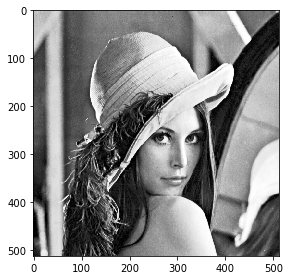

In [241]:
ski.io.imshow(imaucontrast(A))

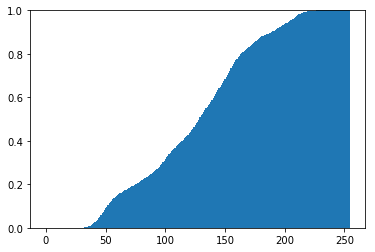

In [219]:
imcumhist(A)

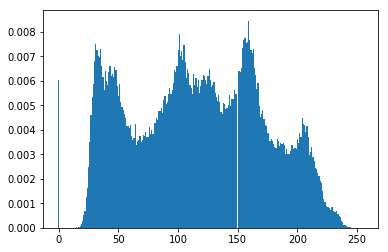

In [218]:
T = np.arange(255)
T[150] = 0
imhist(imhisttrans(B, T))

1.0


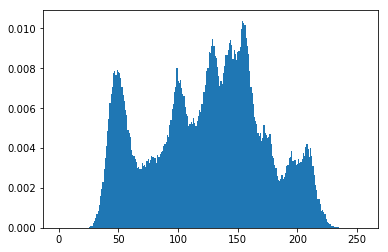

In [215]:
imhist(A)

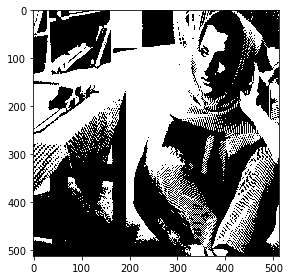

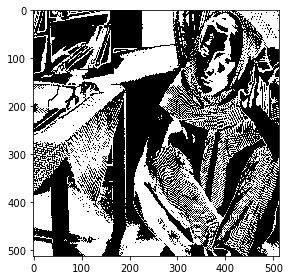

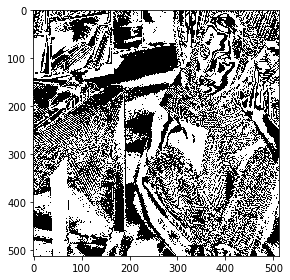

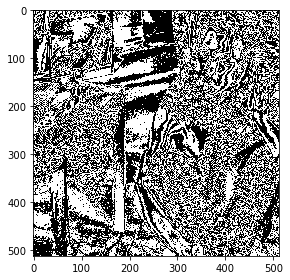

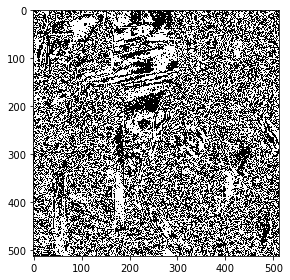

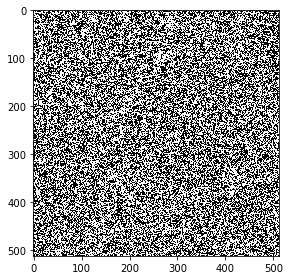

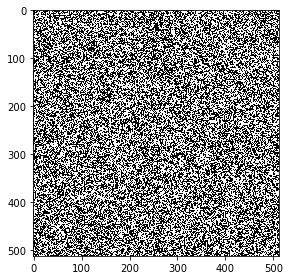

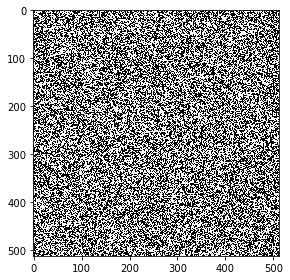

In [49]:
for im in imbits(B):
    plt.figure()
    ski.io.imshow(im)

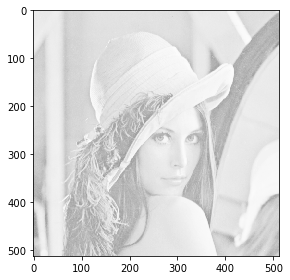

In [6]:
ski.io.imshow(dynrange(A, 255))

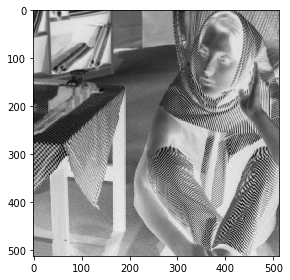

In [7]:
ski.io.imshow(imneg(B))

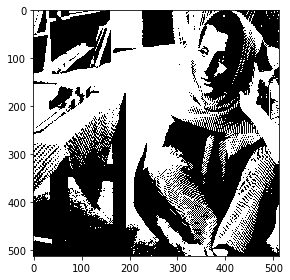

In [8]:
ski.io.imshow(imbinarize(B, 120))

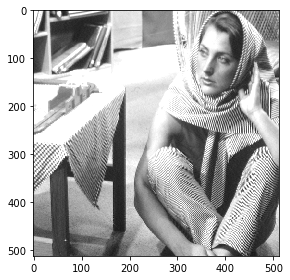

In [9]:
ski.io.imshow(improd(1.42, B, overflow='cap', cap_max=255))

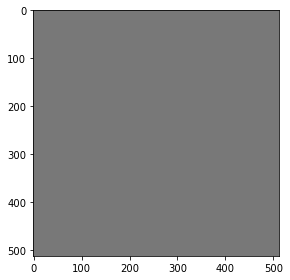

In [19]:
ski.io.imshow(improd(A, B, overflow='cap', cap_max=120))

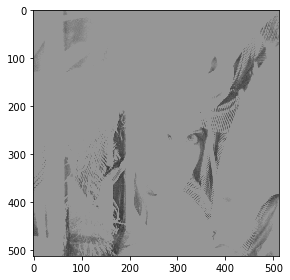

In [11]:
ski.io.imshow(imsum(A, B, overflow='cap', cap_max=150))

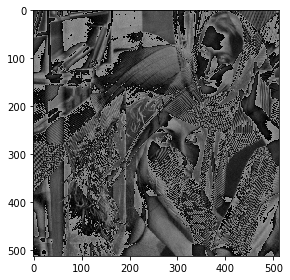

In [12]:
ski.io.imshow(imsum(A, B, overflow='mod', mod_max=150))